# Results

We will present the results of the metrics in this notebook.

In [1]:
from results_preparation import *

In [2]:
folder = "../../XAI_metrics/metrics/no_grid"

## Sum of the ROI divided by the Total sum

### Saliency Maps

#### All Values

Mean value of initial beat: 3.81 +- 15.11%
Mean value of mid beat: 2.31 +- 4.75%
Mean value of final beat: 3.29 +- 6.91%


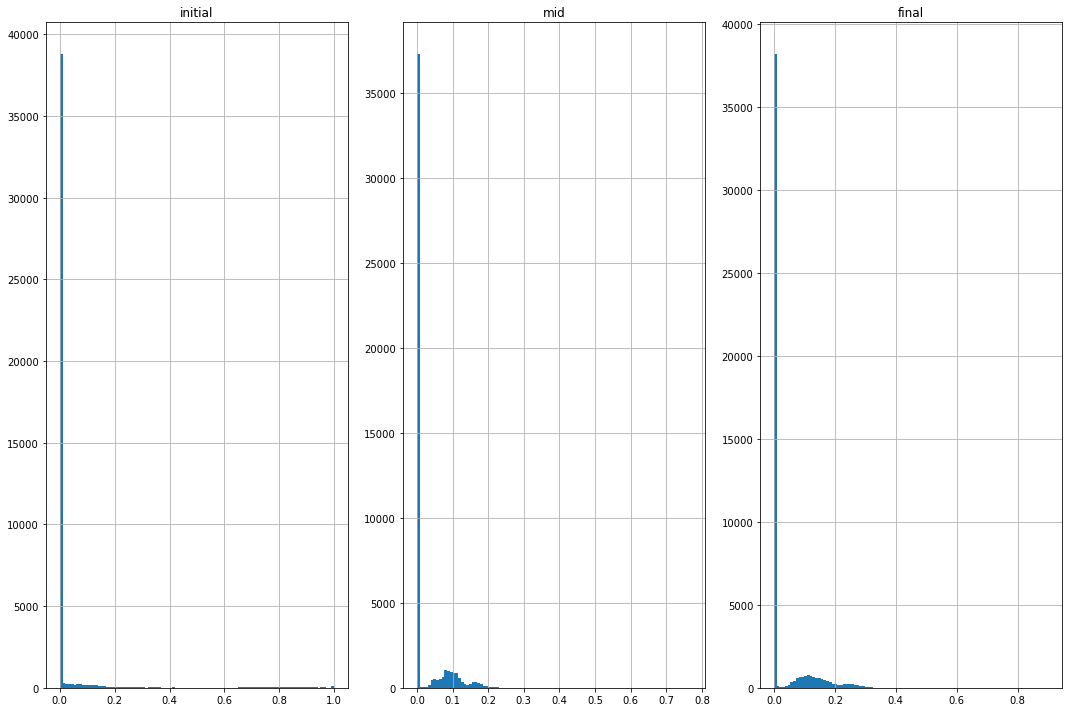

In [3]:
values = present_values(folder)

#### All But 0's

Mean value of initial beat: 29.86 +- 31.77%
Mean value of mid beat: 9.96 +- 4.59%
Mean value of final beat: 14.08 +- 7.22%


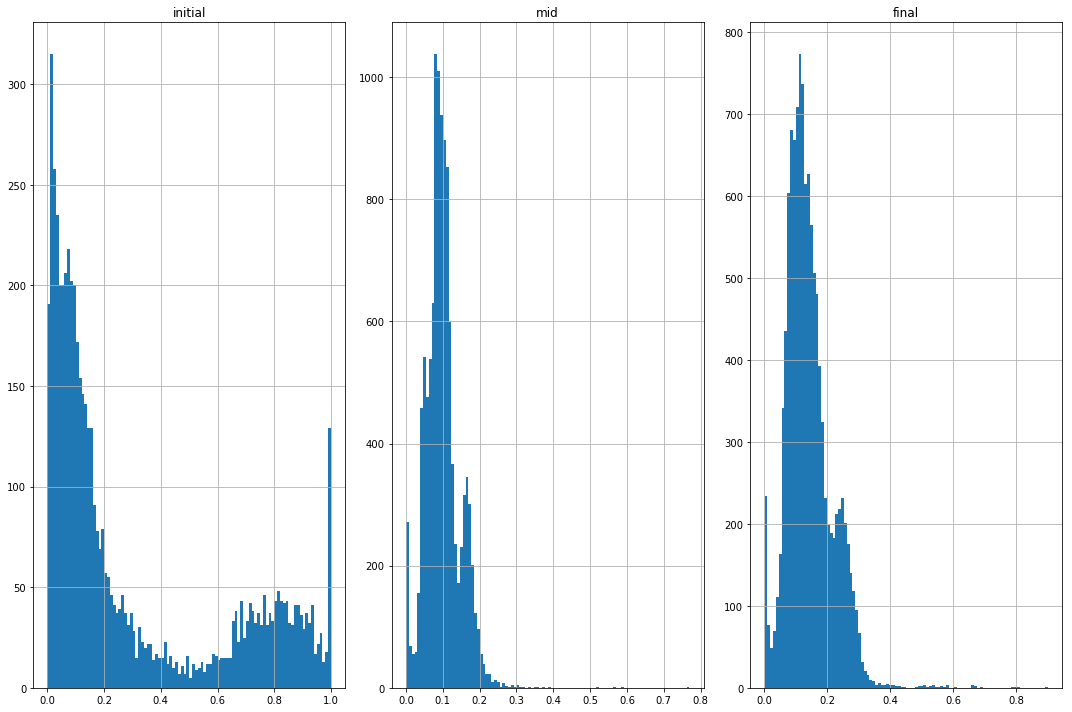

In [4]:
present_values(folder, 0)

#### Correct Classification

Mean value of initial beat: 3.49 +- 14.09%
Mean value of mid beat: 2.30 +- 4.68%
Mean value of final beat: 3.31 +- 6.81%


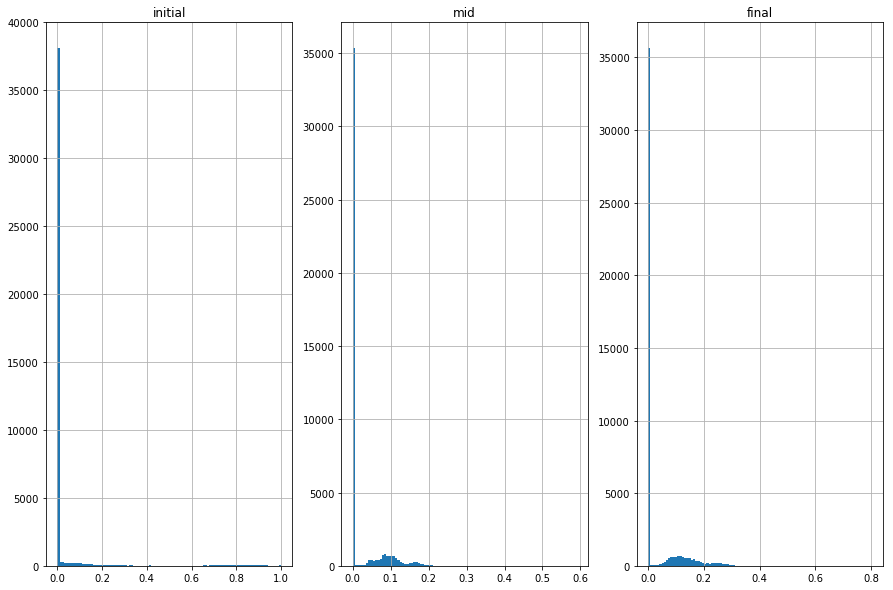

In [5]:
present(folder, ['pred_results', 'ok'], but_zeros=False)

#### Incorrect Classification

Mean value of initial beat: 18.85 +- 36.99%
Mean value of mid beat: 2.51 +- 5.77%
Mean value of final beat: 2.95 +- 8.16%


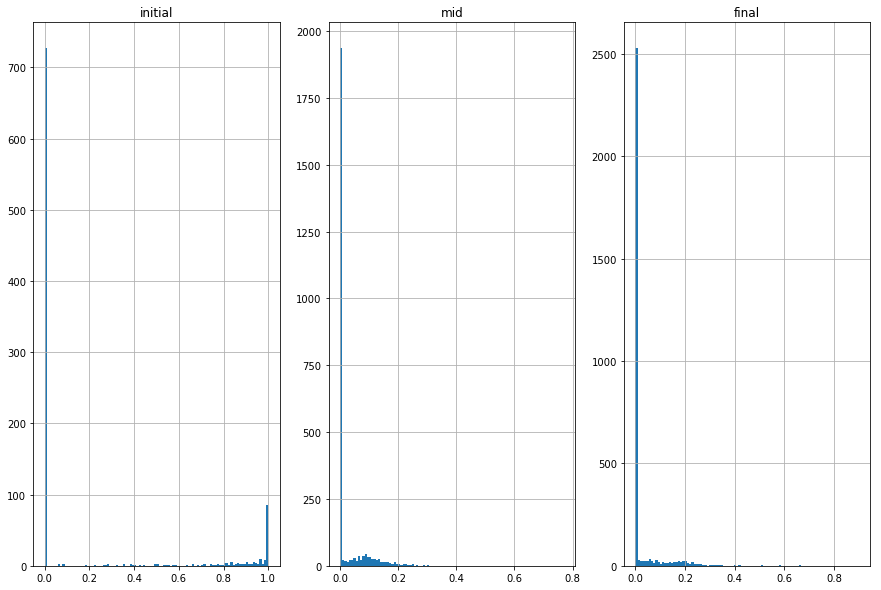

In [6]:
present(folder, ['pred_results', 'wrong'], but_zeros=False)

#### Normal Label

Mean value of initial beat: 1.40 +- 6.61%
Mean value of mid beat: 1.98 +- 4.33%
Mean value of final beat: 2.81 +- 6.22%


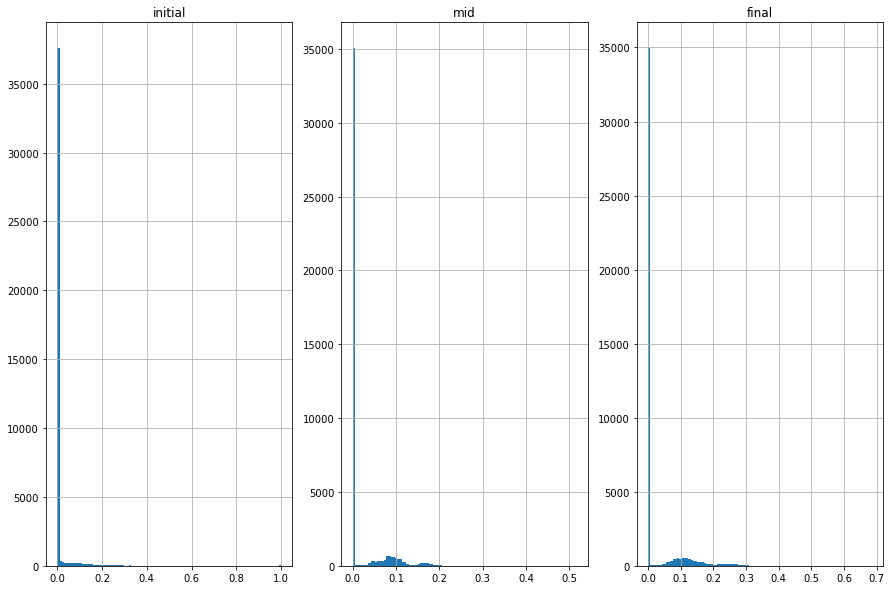

In [7]:
present(folder, ['true_labels', 'normal'], but_zeros=False)

#### Abnormal Label

Mean value of initial beat: 41.19 +- 40.03%
Mean value of mid beat: 5.73 +- 7.07%
Mean value of final beat: 7.25 +- 10.20%


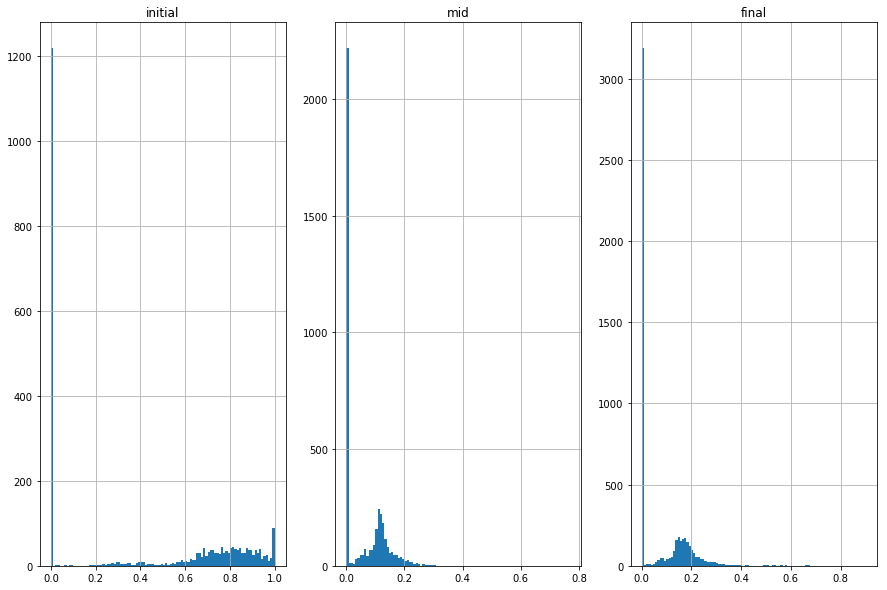

In [8]:
present(folder, ['true_labels', 'abnormal'], but_zeros=False)

# Attention Maps Comparison

In [9]:
folder = '../../data/attribution_maps/'

103_0_222_ok.png


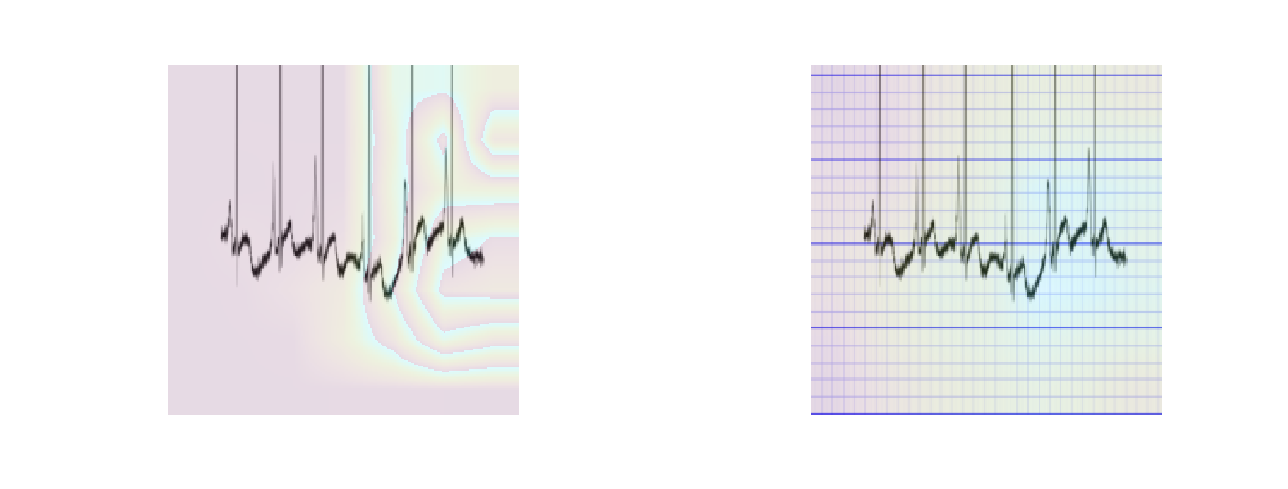

1041_0_222_ok.png


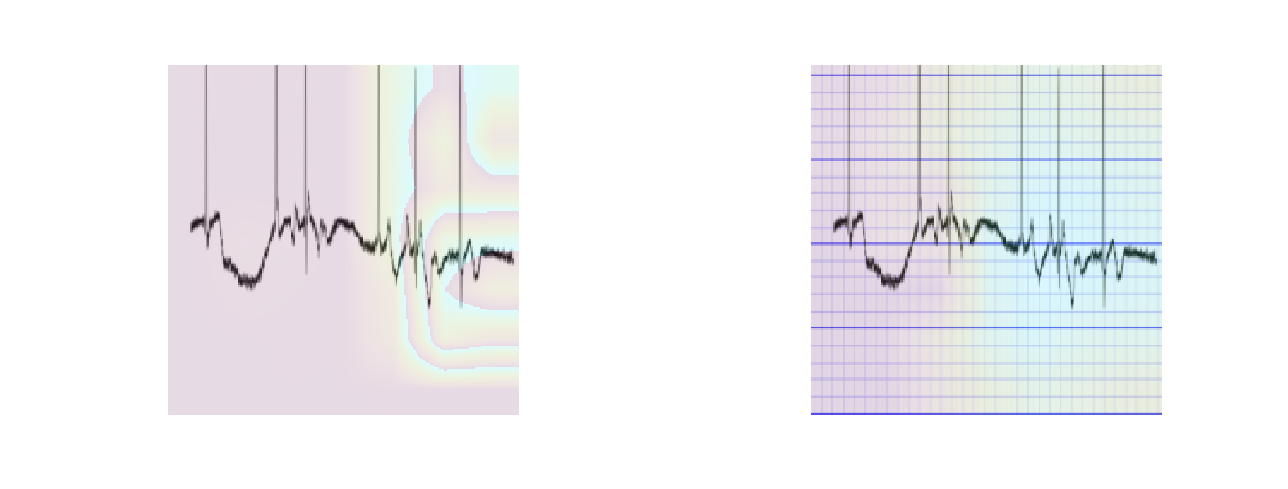

1082_0_212_ok.png


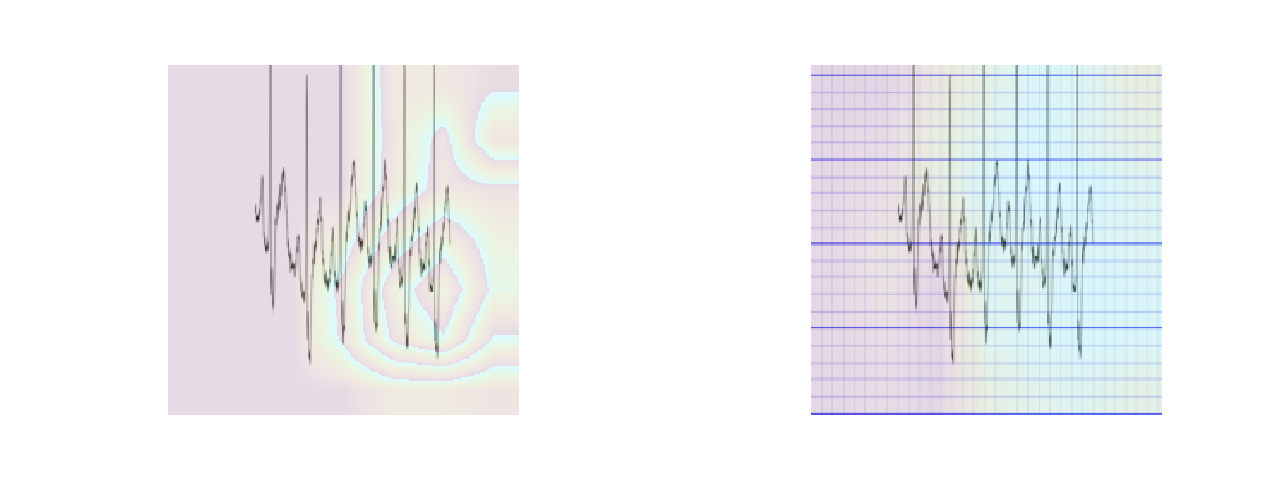

1118_0_117_ok.png


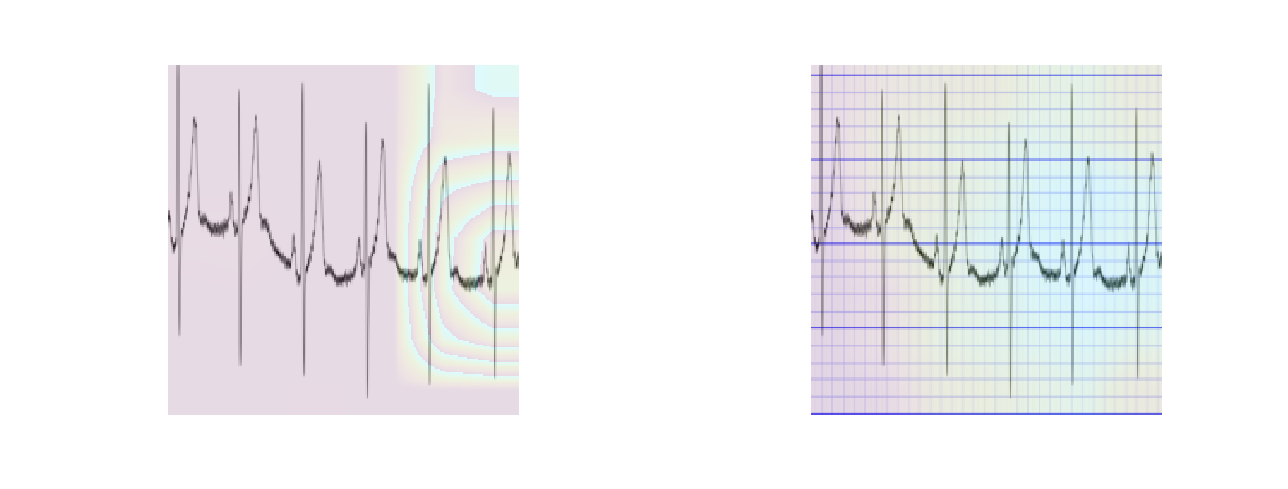

1136_0_105_ok.png


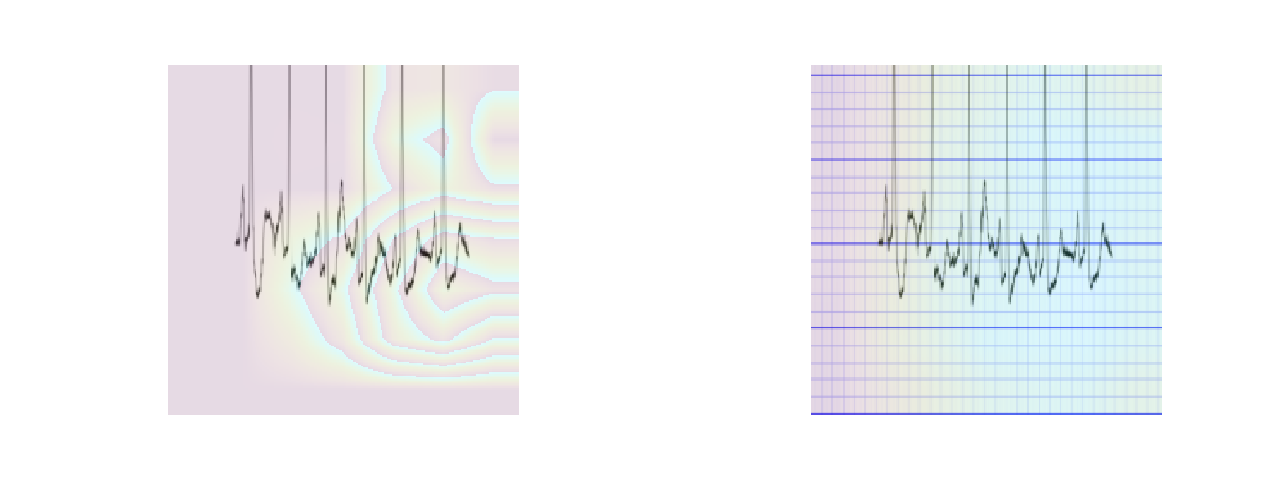

1136_0_213_ok.png


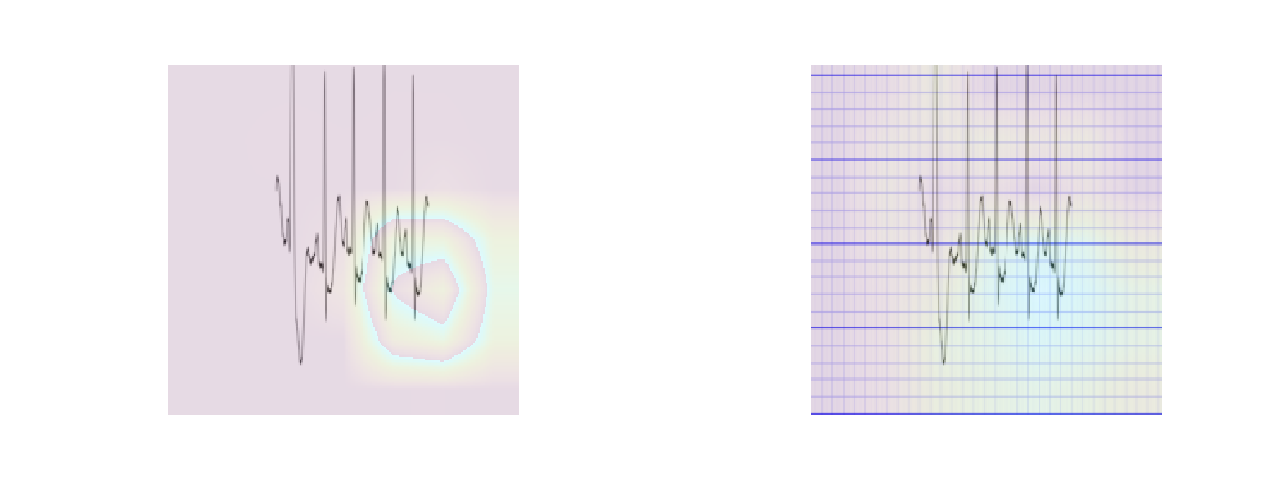

1152_0_228_ok.png


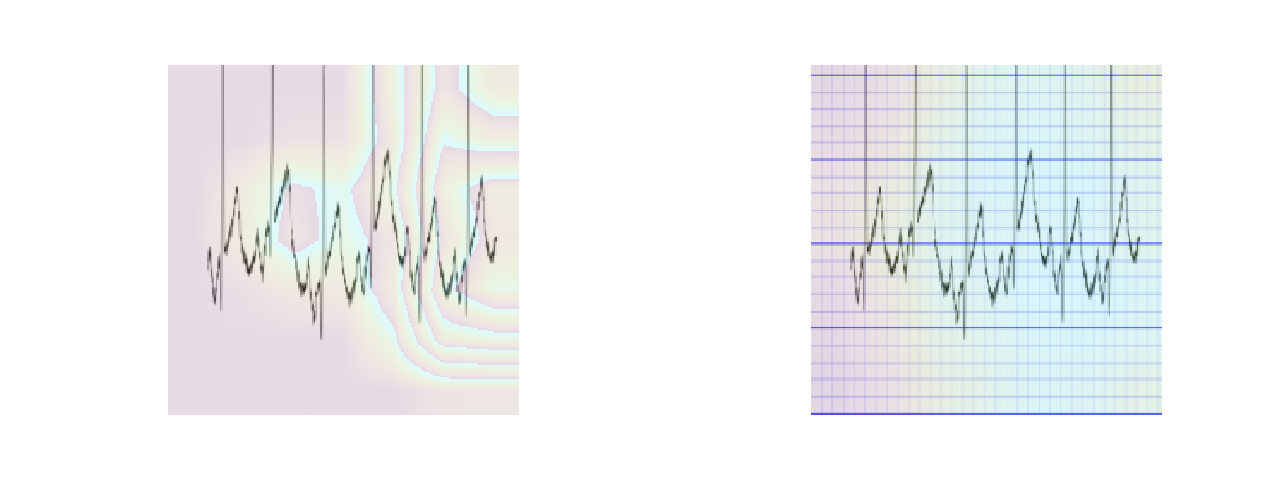

1222_0_200_ok.png


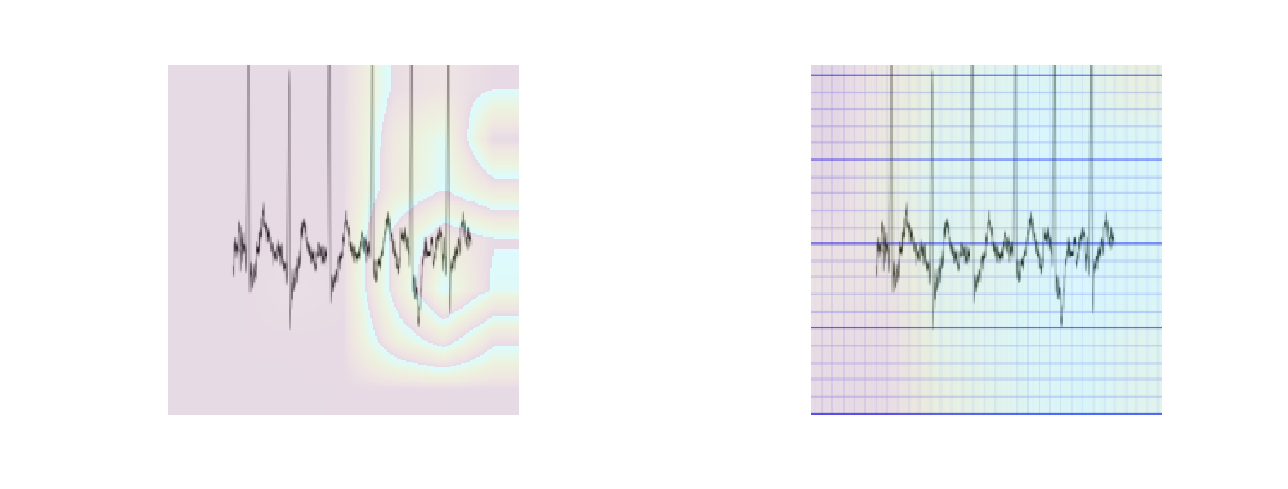

1245_0_103_ok.png


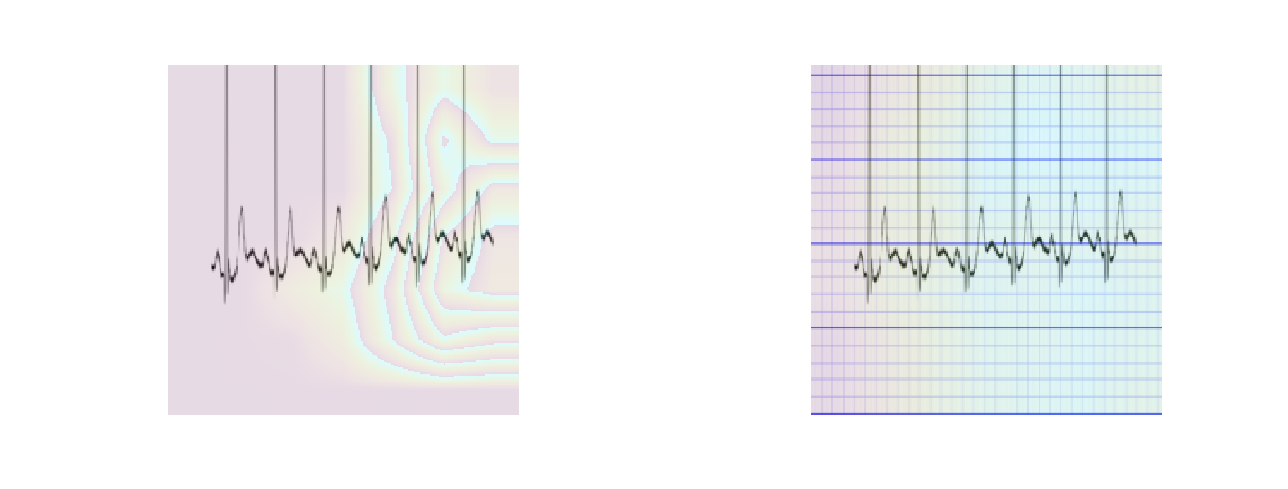

1279_0_210_ok.png


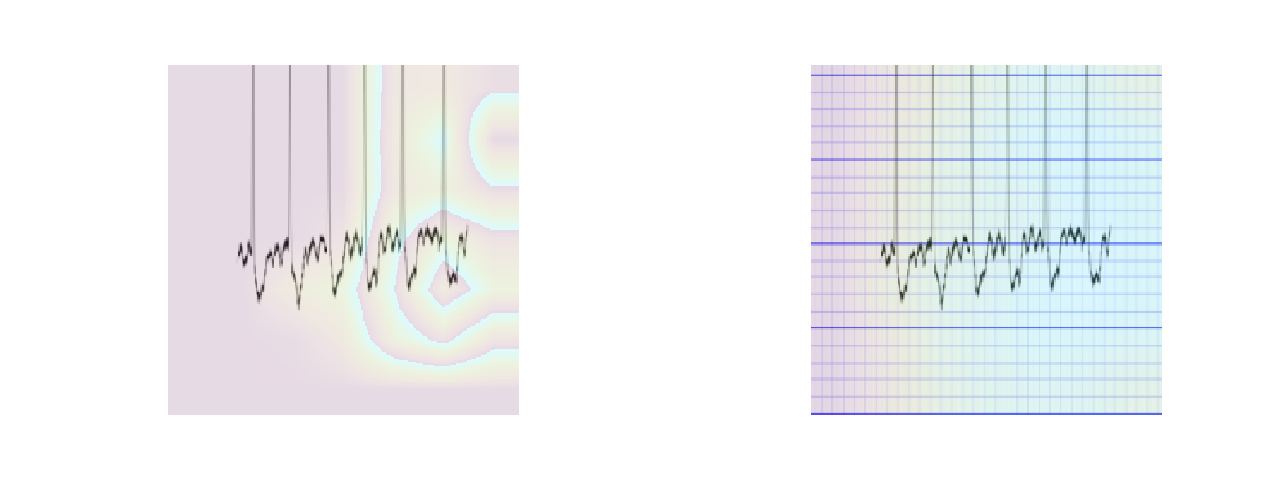

127_0_111_ok.png


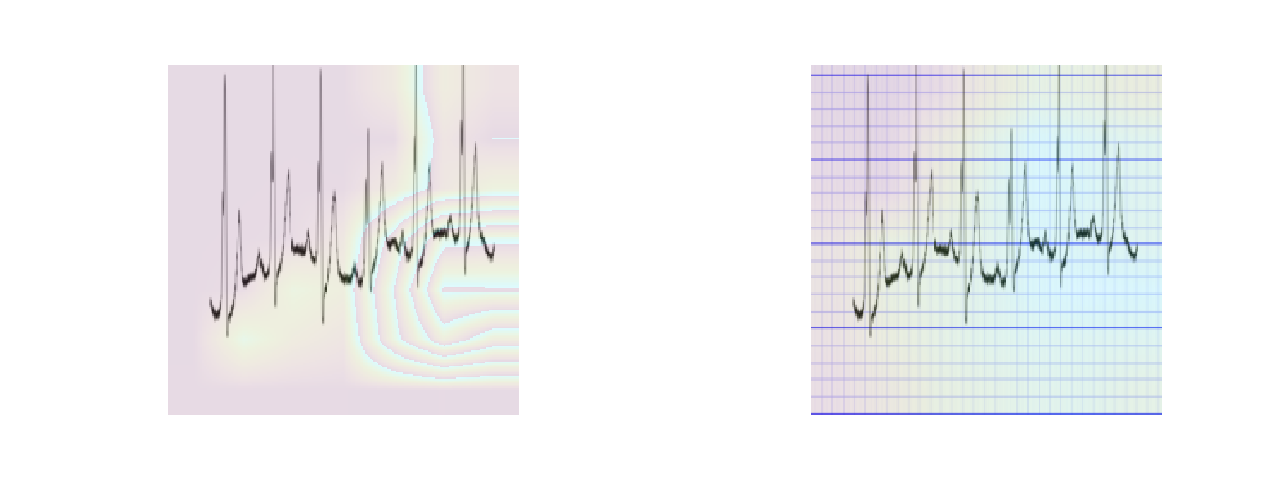

1332_0_219_ok.png


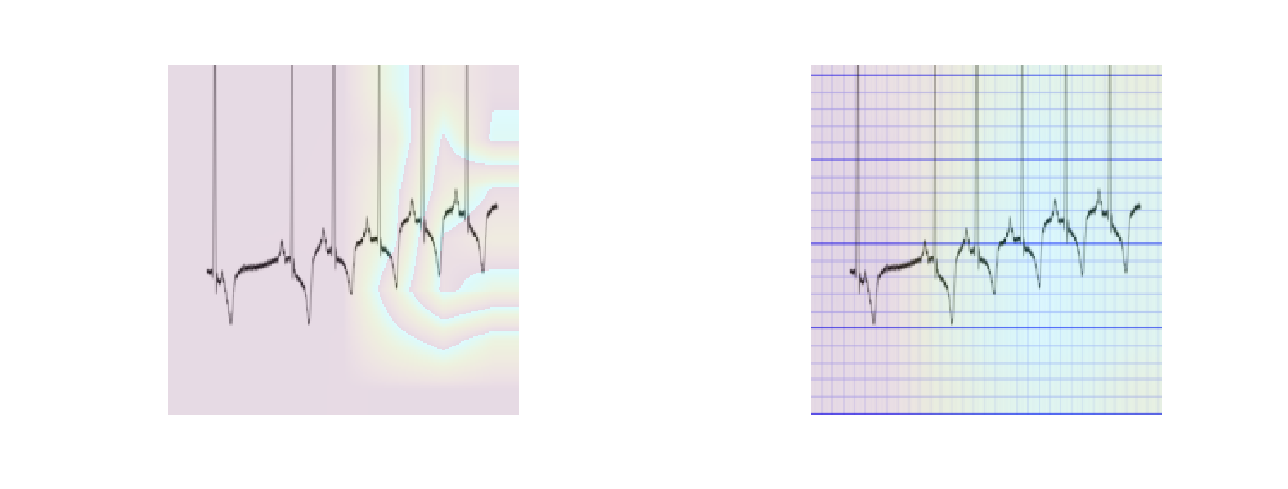

1334_0_228_ok.png


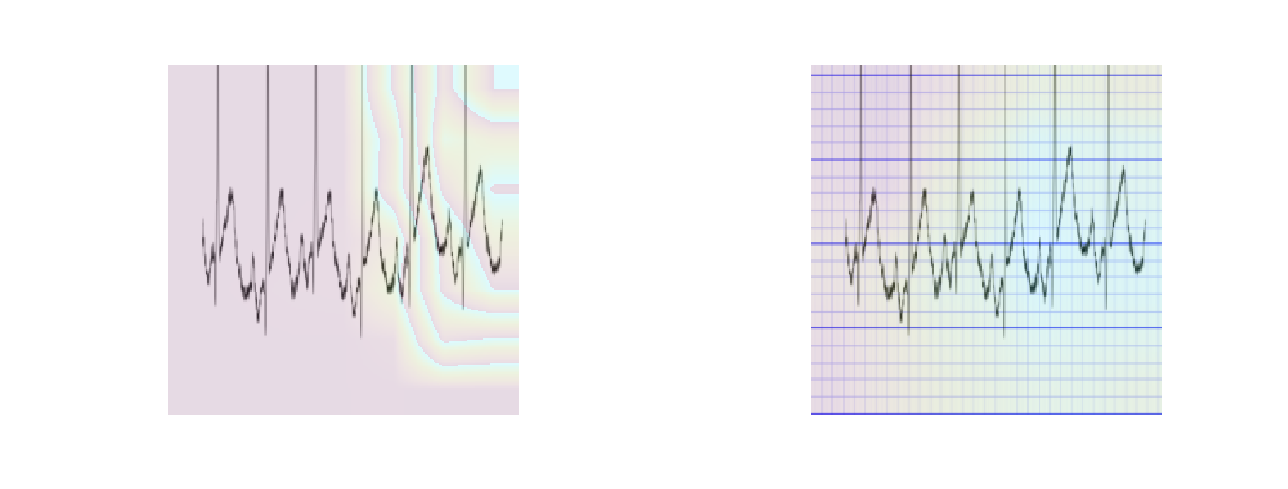

1355_0_234_ok.png


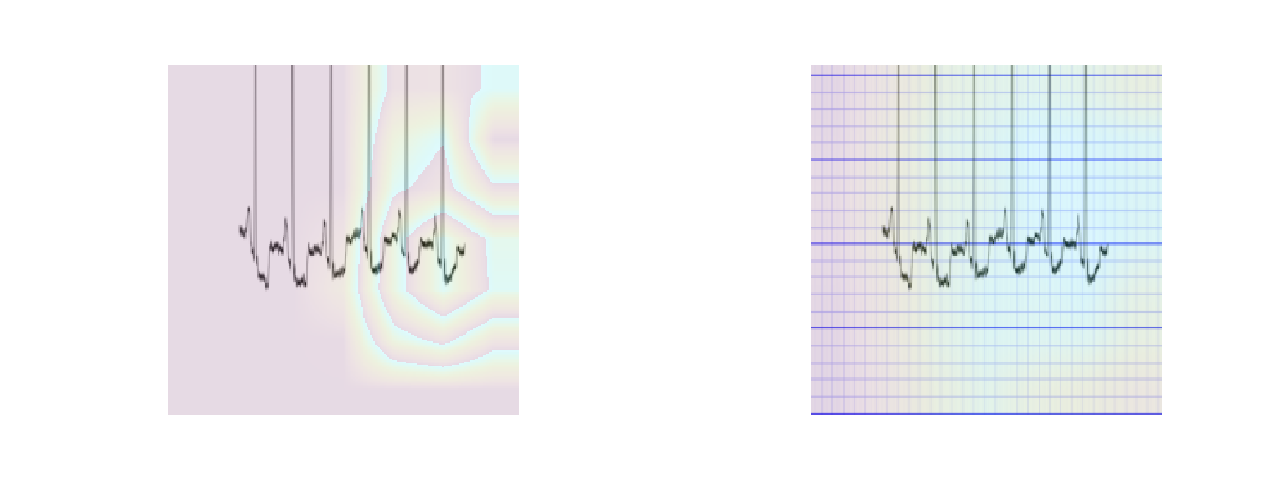

1447_0_214_ok.png


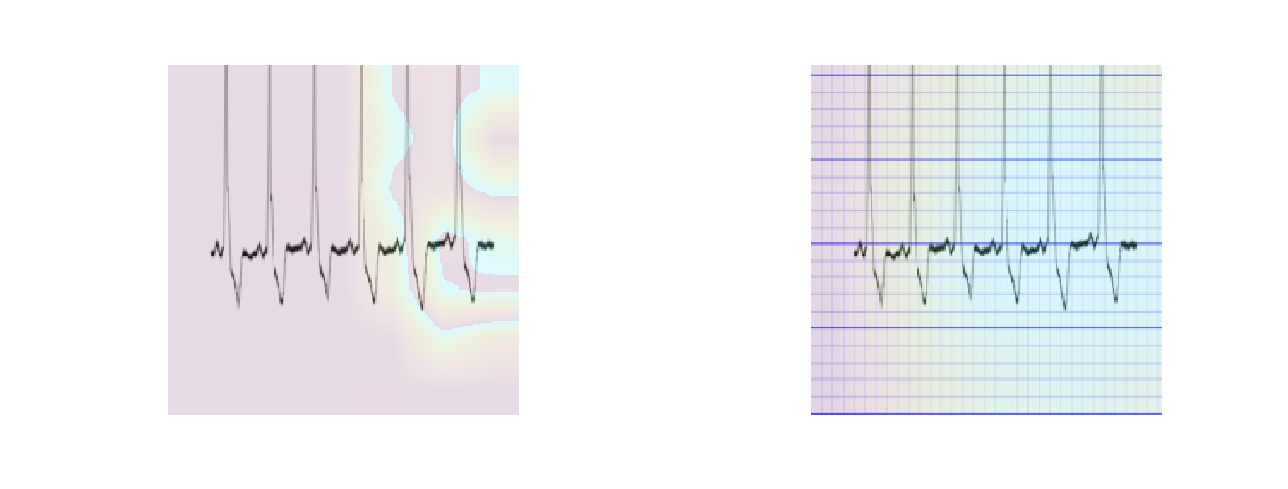

148_0_105_ok.png


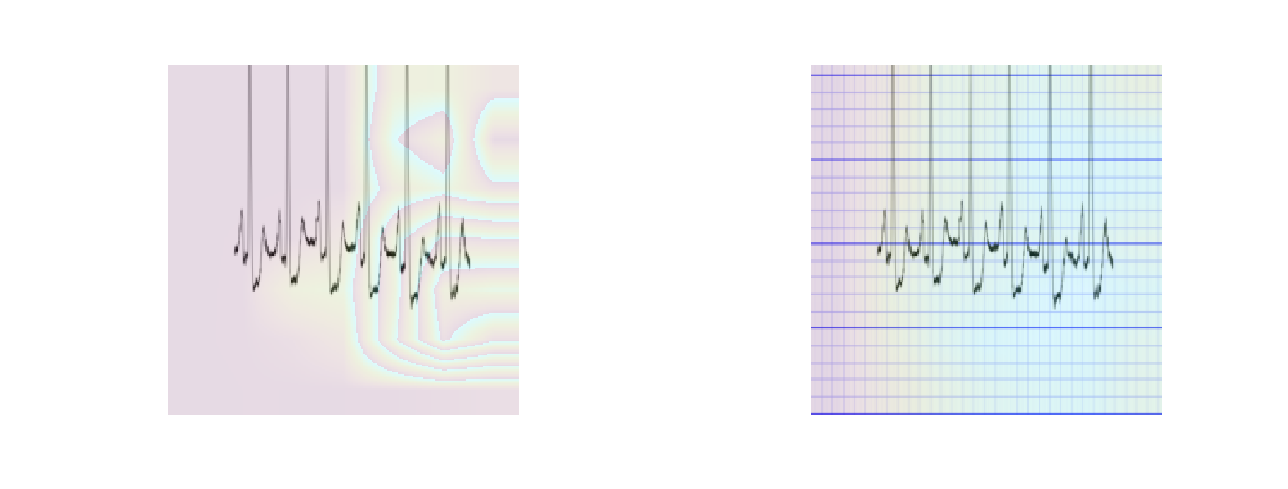

1493_0_212_ok.png


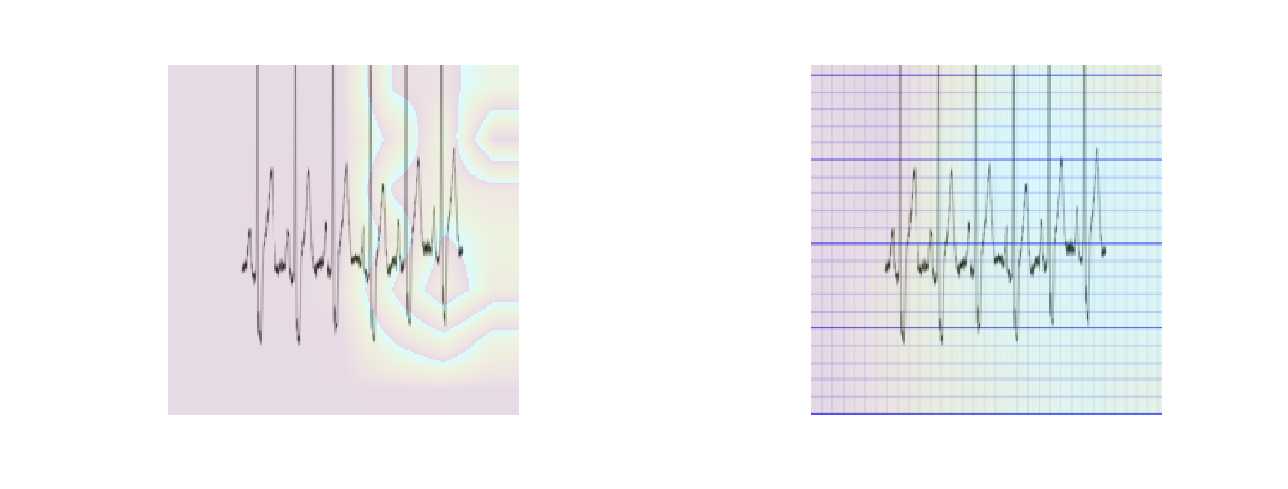

1503_0_100_ok.png


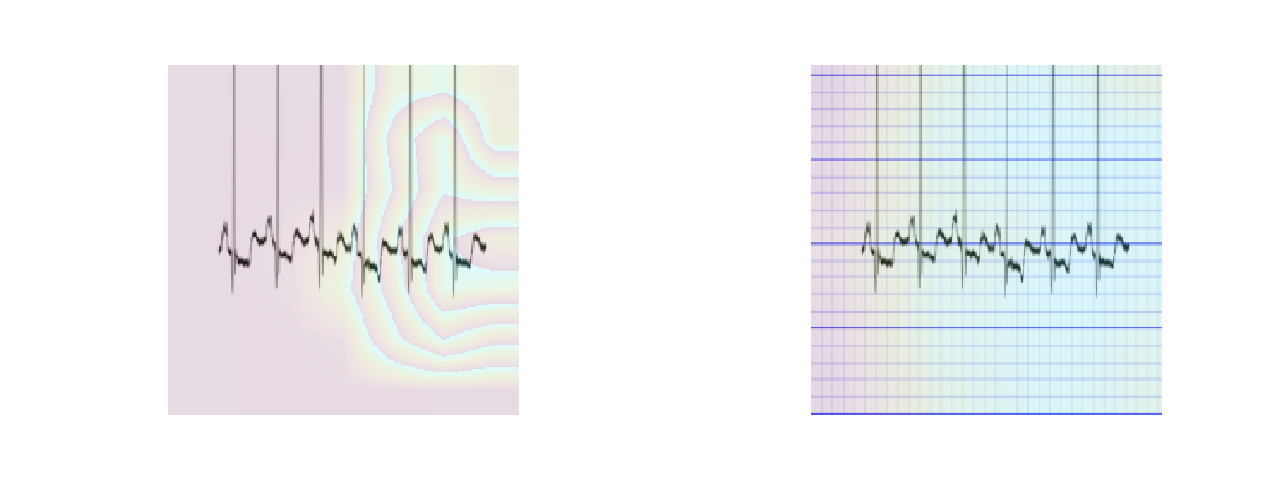

1605_0_222_ok.png


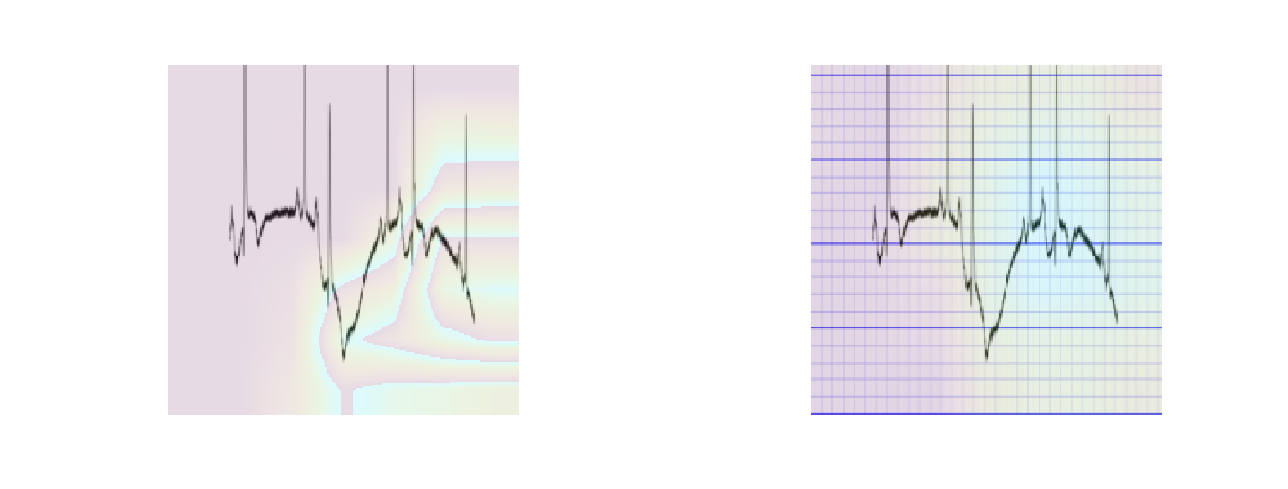

160_0_121_ok.png


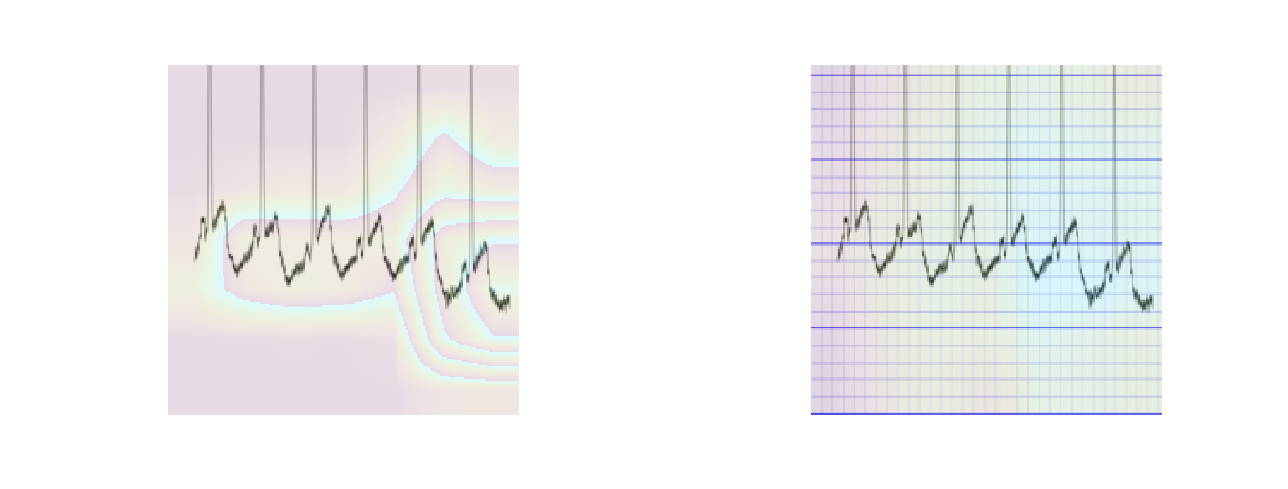

In [10]:
maps_comparison("final", "grad_cam_map", "normal", folder)